In [ ]:
%matplotlib inline
%load_ext autoreload
%autoreload 2

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def imshow(im):
    plt.imshow(np.asarray(im))

# Python Imaging Library (PIL)
> Adds image processing capabilites to the Python interpreter. It handles raster images i.e. rectangles of pixel data.

## Tutorial
Most important class is `Image`.

In [ ]:
from PIL import Image
im = Image.open('images/1.JPEG')

In [ ]:
type(im)

PIL.JpegImagePlugin.JpegImageFile

### format, size, mode, getbands()
* `format` identifies the source of the image. If image not read from file then it is set to `None`.
* `size` return tuple(width, height)
* Different values of mode are `L`->(luminance) for greyscale images, 'RGB'->for true color images and 'CMYK'->for pre-press images
* getbands() -> returns the bands in the image

In [ ]:
im.format, im.size, im.mode, im.getbands()

('JPEG', (500, 333), 'RGB', ('R', 'G', 'B'))

In [ ]:
# Using this method is not very efficient as it saves image to a temporary file and calls a utilty to display the image.
im.show()

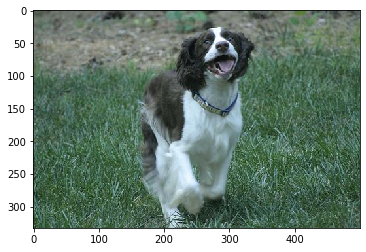

In [ ]:
imshow(im)

### open(), save()
When opening a file the file format is automatical yinferred based on the contents of the file. While saving the file, if format is not specified, then filename extension is used to discover the file storage format to use.

In [ ]:
# If you want to convert files then you can use open() and then save() to specific format
im = Image.open('images/1.JPEG')
im.save('images/3.PNG')

When you use `open()` the library does not decode or load the raster data unless it really has to. When you open a file, the file header is read to determine the file format and extract things like mode, size, and other propoerties required to decode the file, but the rest of the file is not processed until later.

### crop(), paste(), split(), merge()
* `crop()` -> to extract subrectangles from an image. The region is a 4-tuple where coordinates are (left, upper, right, lower). (0,0) is upper left corner.
* `paste()` -> to replace regions in an image. The modes need not match of the region and image. `paste()` also takes a transparency mask as an argument.
* `split()` -> split the image channels (get individual bands of the image)
* `merge()` -> merge individual bands (channels) into a single image

**Note**:- The first three methods are provided by `PIL.Image.Image` and last method is provided by `PIL.Image`.

In [ ]:
box = (50, 150, 250, 300)
region = im.crop(box)

region.show()

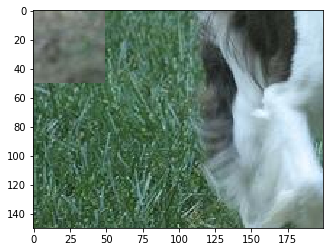

In [ ]:
imshow(region)

In [ ]:
region = region.transpose(Image.ROTATE_180)
im.paste(region, box)

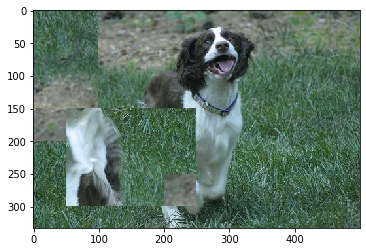

In [ ]:
imshow(im)

In [ ]:
r, g, b = im.split()
im = Image.merge("RGB", (b, g, r))

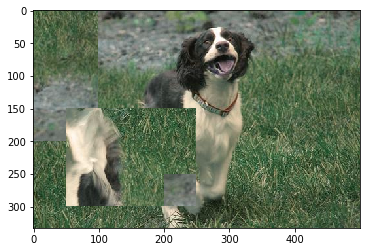

In [ ]:
imshow(im)

### resize(), rotate(), transpose()

In [ ]:
im = Image.open('images/1.JPEG')

In [ ]:
out = im.resize((224, 224))

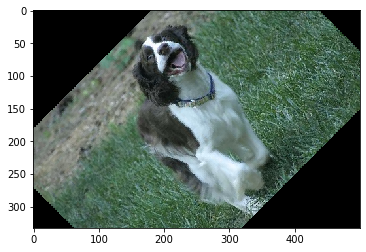

In [ ]:
out = im.rotate(45) # degrees counter-clockwise with zero-padding
imshow(out)

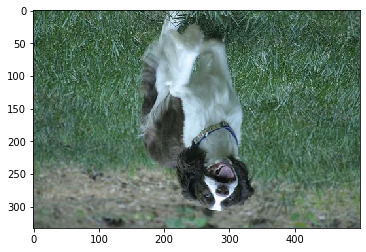

In [ ]:
# transpose rotates image in the direction you provide
out = im.transpose(Image.FLIP_TOP_BOTTOM)
imshow(out)

### convert()
It allows you to convert images between different pixel representations. All modes can be converted to `L` and `RGB` directly. Use `RGB` mode as an intermediate when you want to convert between other modes.

In [ ]:
out = im.convert('L')
out.size # black-white

(500, 333)

### PIL.ImageFilter
Contains a number of pre-defined enhancement filters that can be used with `filter()` method.

In [ ]:
from PIL import ImageFilter
out = im.filter(ImageFilter.DETAIL)

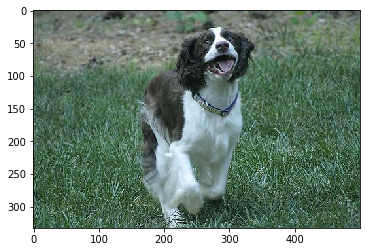

In [ ]:
imshow(out)

### point()
If you want to apply some function to every pixel-value of an image. You can also use `point()` and `paste()` to selectively modify an image.

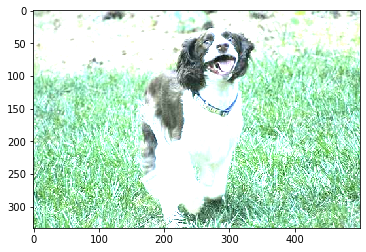

In [ ]:
out = im.point(lambda i: i*2.4) # In this case it multiples every pixel value by 2.4
imshow(out)

In [ ]:
R,G,B = 0,1,2
source = im.split()
mask = source[R].point(lambda i: i<100 and 255) # pixel values that are >=100 become 0 and other become 255
out = source[G].point(lambda i: i*0.7)

source[G].paste(out, box=None, mask=mask)
im = Image.merge(im.mode, source)

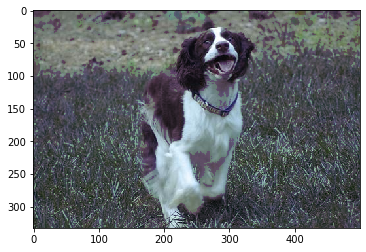

In [ ]:
imshow(im)

### PIL.ImageEnhance
For advanced imageenhancements.

In [ ]:
from PIL import ImageEnhance
im = Image.open('images/1.JPEG')

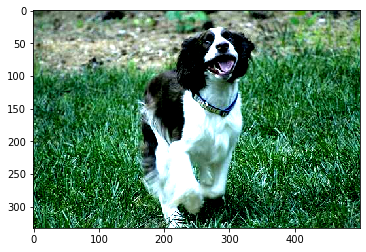

In [ ]:
enh = ImageEnhance.Contrast(im)
out = enh.enhance(2.4)
imshow(out)

### Read from tar file

In [ ]:
from PIL.TarIO import TarIO
fp = TarIO('images/2.tar', '2.JPEG')
im = Image.open(fp)

## Modes
The `mode` of an image defines the type and depth of a pixel in the image. Each pixel uses the full range of the bit depth i.e. 1-bit pixel has range \[0-1\] and 8-bit pixel has range \[0-255\].
* **1** -> 1-bit pixels (black and white)
* **L** -> 8-bit pixels (black and white)
* **P** -> 8-bit pixels, mapped to any other mode using a color pallete
* **RGB** -> 3x8-bit pixels, true color
* **RGBA** -> 4x8-bit pixels, true color and transparency mask
* **HSV** -> 3x8-bit pixels, Hue, Saturation, Value color space
* **I** -> 32-bit signed integer pixels
* **F** -> 32-bit floating point pixels
* Other are **CMYK**, **YCbCr**, **LAB**

## Resampling filters
* **NEAREST**
* **BOX** -> worst quality, best performance
* **BILINEAR**
* **HAMMING**
* **BICUBIC**
* **LANCZOS** -> Best quality, worst performance

The order of quality increase as we move from BOX to LANCZOS and vice versa for perfoamcen.

In [ ]:
from PIL.Image import Image as i

In [ ]:
i.alpha_composite

In [ ]:
sorted(im.getcolors(200000))

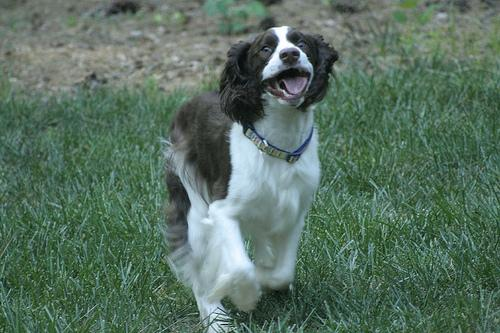

In [ ]:
im

In [ ]:
im.getdata()

In [ ]:
im.getextrema()

((0, 255), (5, 255), (0, 255))

In [ ]:
im.getpalette()

In [ ]:
im.getpixel((0,0))

(88, 98, 90)

In [ ]:
im.getpixel((0,0))

(88, 98, 90)

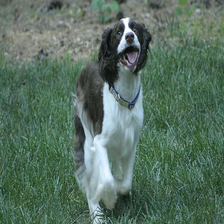

In [ ]:
im.resize((224, 224), resample=Image.LANCZOS)

In [ ]:
im.info

{'jfif': 257, 'jfif_version': (1, 1), 'jfif_unit': 0, 'jfif_density': (1, 1)}